# Image Processing

In [1]:
import PIL
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# Working with Pixels

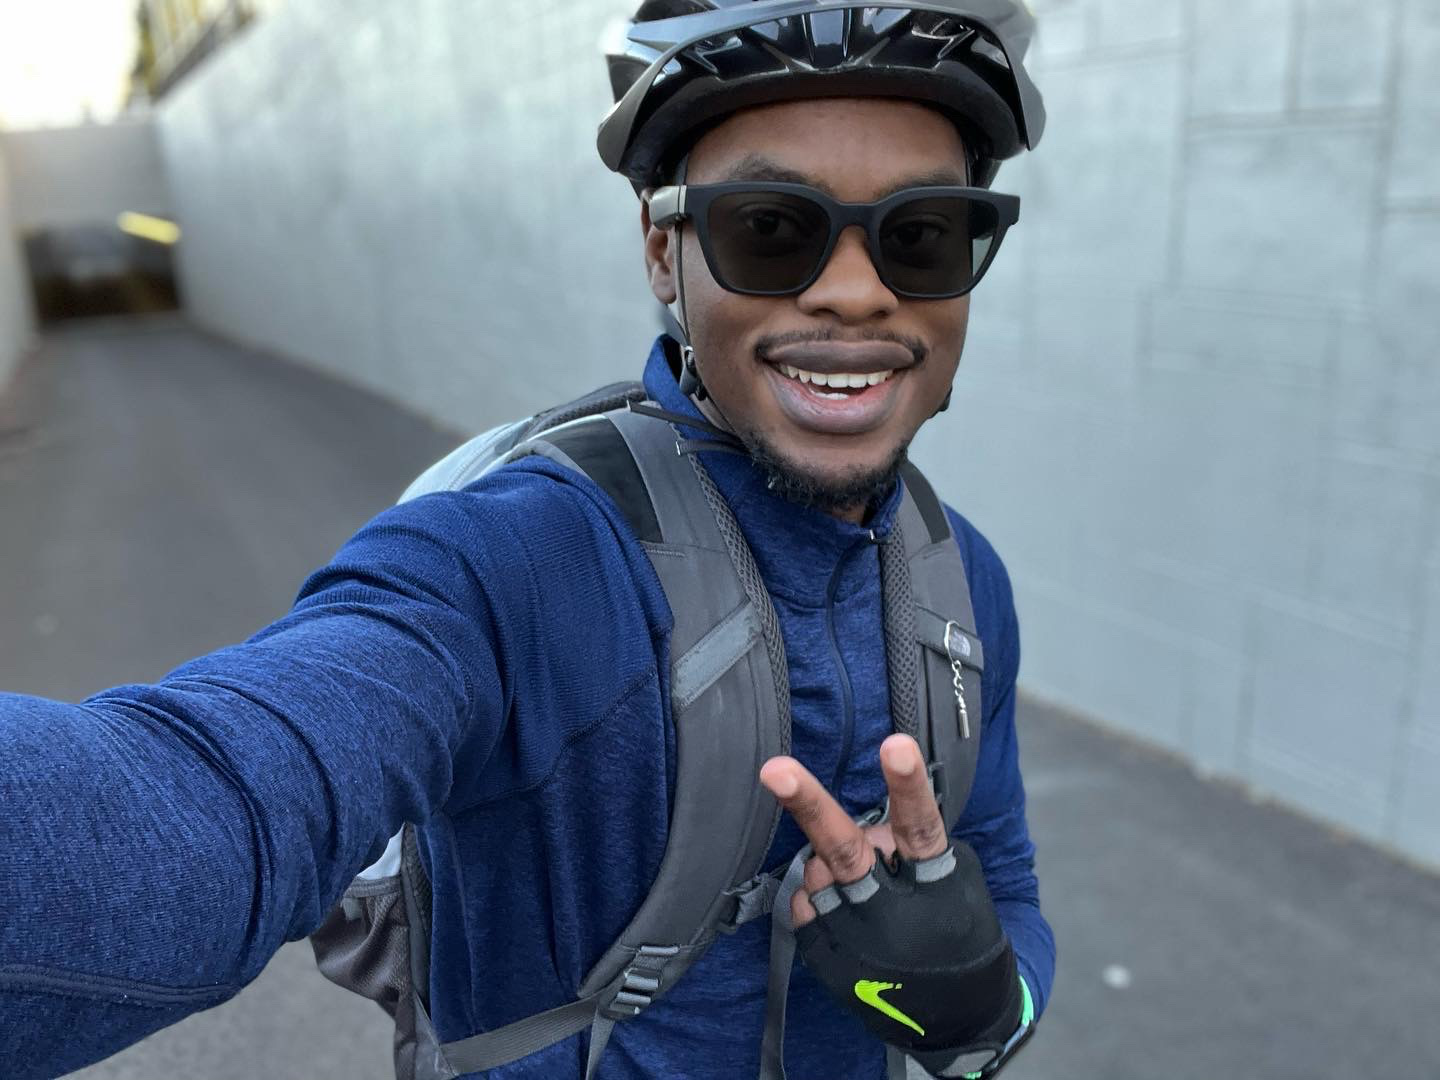

In [2]:
imageFilePath = "./skate.jpg"
image = Image.open(imageFilePath)
image

In [3]:
width, height = image.size
image.size

(1440, 1080)

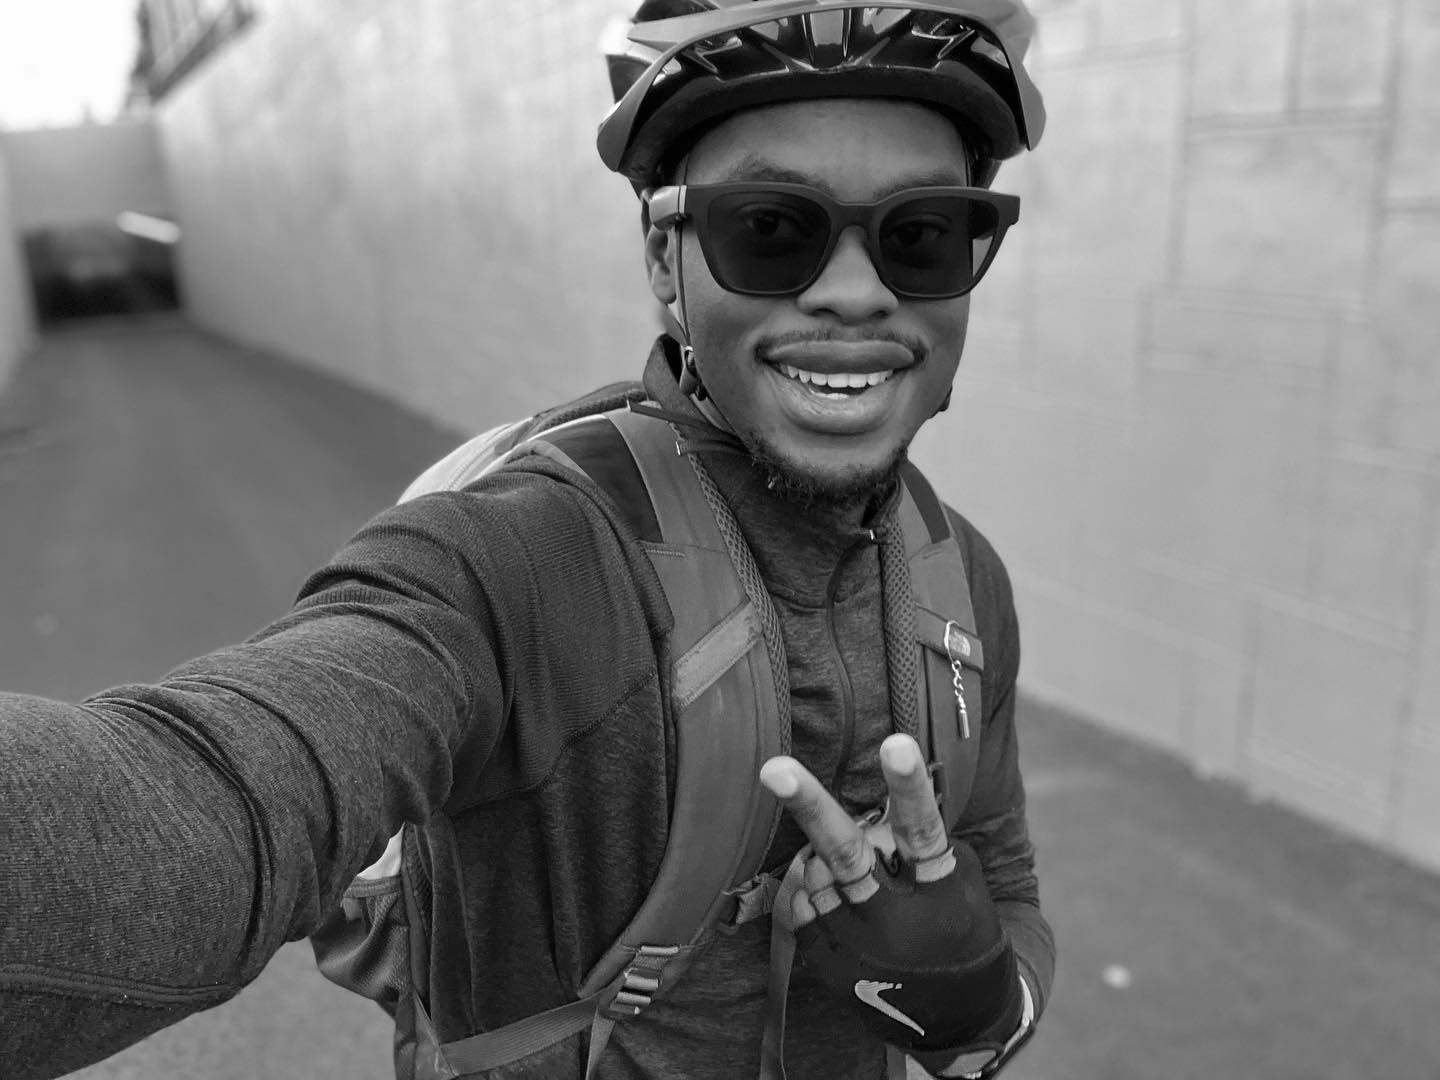

In [4]:
def ConvertToGrayScale(img, weights=[0.2, 0.5, 0.1]):
    image_ = img.copy()
    width, height = img.copy().size
    image_pixel_matrix = image_.load()
    for i in range(width):
        for j in range(height):
            red, green, blue = image.getpixel((i, j))
            gray_scale = int((
                weights[0]*red+
                weights[1]*green+
                weights[2]*blue)/3)
            image_pixel_matrix[i, j]= (gray_scale, gray_scale, gray_scale)
    return image_
        
ConvertToGrayScale(image, [1, 1, 1])

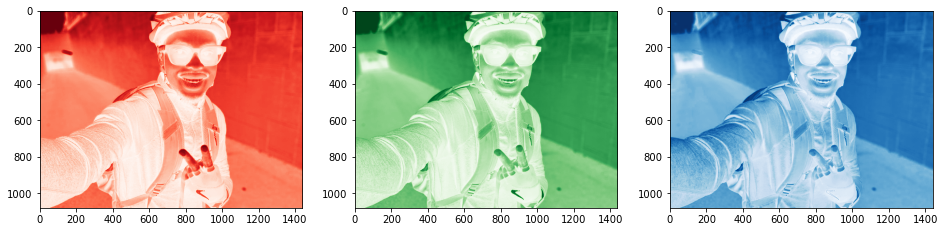

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes[0].imshow(image.getchannel('R'), cmap="Reds")
axes[1].imshow(image.getchannel('G'), cmap="Greens")
axes[2].imshow(image.getchannel('B'), cmap="Blues")
plt.show()

# Brightness

In [6]:
cv2Image = cv2.imread(imageFilePath)
cv2Image

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [201, 194, 174],
        [201, 194, 174],
        [201, 194, 174]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [201, 194, 174],
        [201, 194, 174],
        [201, 194, 174]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [201, 194, 174],
        [201, 194, 174],
        [201, 194, 174]],

       ...,

       [[ 64,  31,  12],
        [ 61,  28,   9],
        [ 67,  34,  15],
        ...,
        [119, 110,  97],
        [119, 110,  97],
        [119, 110,  97]],

       [[ 62,  29,  10],
        [ 57,  24,   5],
        [ 66,  33,  14],
        ...,
        [119, 110,  97],
        [119, 110,  97],
        [119, 110,  97]],

       [[ 61,  28,   9],
        [ 55,  22,   3],
        [ 66,  33,  14],
        ...,
        [119, 110,  97],
        [118, 109,  96],
        [118, 109,  96]]

In [7]:
cv2Image.shape

(1080, 1440, 3)

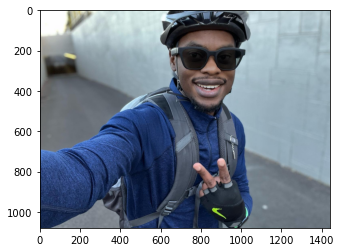

In [8]:
image_rgb = cv2.cvtColor(cv2Image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [9]:
def adjust_brightness(img, alpha = 0, beta = 0):
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted

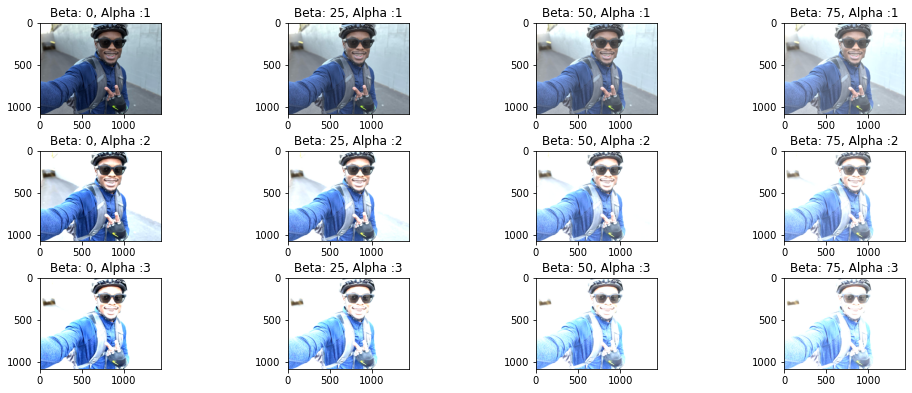

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(16, 6))

index_beta = 0;
index_alpha = 0
for alpha in range(1, 4, 1):
    for beta in range(0, 100, 25):
        axes[index_alpha][index_beta].imshow(adjust_brightness(image_rgb, alpha = alpha, beta = beta))
        axes[index_alpha][index_beta].set_title(f"Beta: {beta}, Alpha :{alpha}")
        index_beta += 1
    index_beta = 0
    index_alpha += 1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Guassian Blur

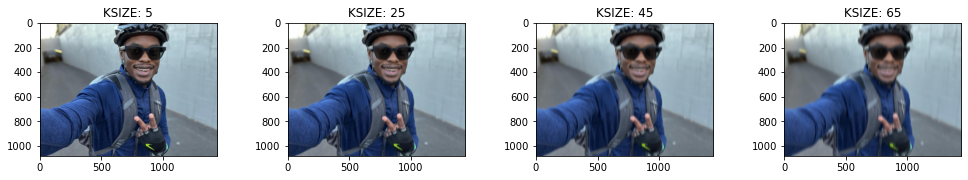

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

index = 0
for size in range(5, 85, 20):
    axes[index].imshow(cv2.GaussianBlur(image_rgb, ksize=(5, size), sigmaX=0))
    axes[index].set_title(f"KSIZE: {size}")
    index += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Cropping

In [12]:
image_rgb.shape

(1080, 1440, 3)

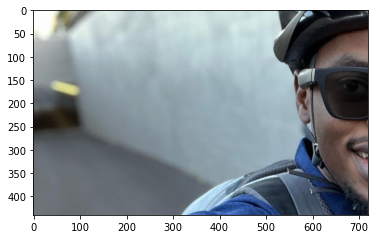

In [13]:
plt.imshow(image_rgb[60:500,80:800])
plt.show()

# Feature Extraction, Edge Detection and Kernels

### HOG
- HOG does not work well with lighting and bluring changes
- Slow and computationaly expensive
- Not scale and rotation invariant
- Suseptive to size and orientation changes

### SIFT
- Unaffected by size and orientation
- Has better acuracy than HOG
- Scale and rotation invariant
- Slow and computationaly expensive
- Mathematically complex

### Convolution
- Can be used to extract al vertical/horizontal edges from the image
- Can be used to higlight, sharpen,blur and focus certain places in an image


### 1. Prewitt Ftiler/Kernel

In [14]:
kernel_x = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])
kernel_y = np.array([
    [-1, 0, 1],
    [-1, 0, 0],
    [-1, 0, 1]
])

In [15]:
prewitt_x = cv2.filter2D(image_rgb, -1, kernel_x) # horizontal edge detector
prewitt_y = cv2.filter2D(image_rgb, -1, kernel_y) # vertical edge detector
prewitt_xy = cv2.bitwise_or(prewitt_x, prewitt_y) # vertical + horizontal detector
transformed_imgae = cv2.hconcat((prewitt_x, prewitt_y, prewitt_xy))

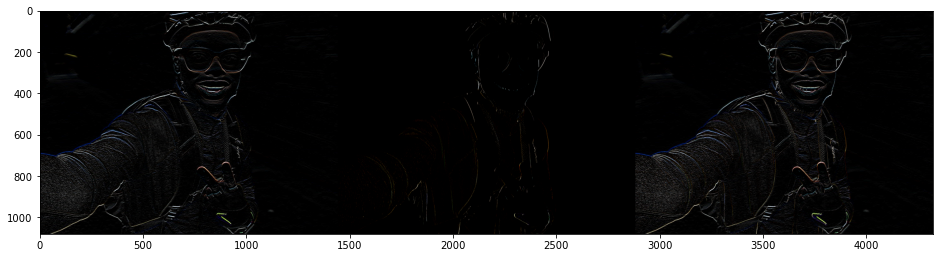

In [16]:
plt.subplots(1, 1, figsize=(16, 9))
plt.imshow(transformed_imgae)

### 2. The Sobel Filter

In [17]:
sobelx = cv2.Sobel(src=image_rgb, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobely = cv2.Sobel(src=image_rgb, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
sobelxy = cv2.bitwise_or(sobelx, sobely)
transformed_imgae = cv2.hconcat((sobelx, sobely, sobelxy))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


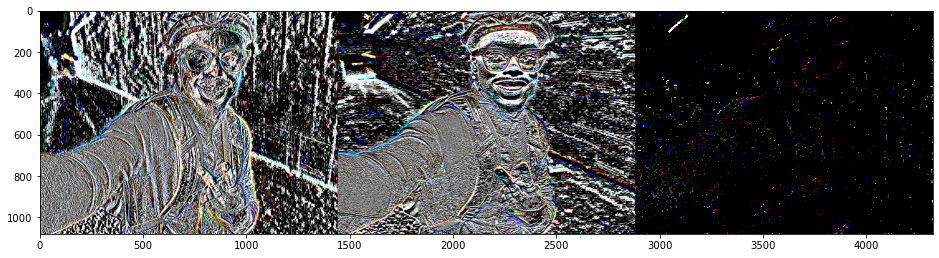

In [18]:
plt.subplots(1, 1, figsize=(16, 9))
plt.imshow(transformed_imgae)

### 3. Laplacian Filter

In [19]:
laplacian=cv2.Laplacian(image_rgb, cv2.CV_64F)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


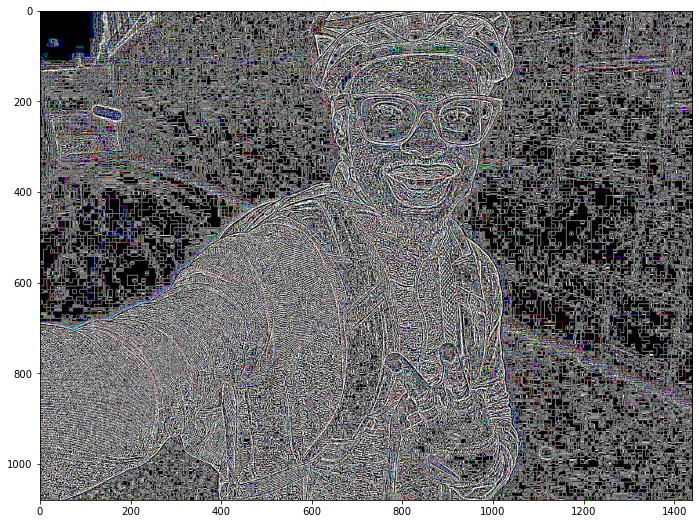

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(16, 9))
plt.imshow(laplacian)